# Tutorial: Elastic Net: The Best of Both Worlds

Sejauh ini, kita telah dihadapkan pada pilihan: menggunakan Ridge (L2) yang mengecilkan semua koefisien, atau Lasso (L1) yang dapat menghilangkan beberapa koefisien sepenuhnya.

Tapi, bagaimana jika kita tidak yakin mana yang lebih baik? Bagaimana jika kita ingin sedikit dari keduanya? Di sinilah **Elastic Net** masuk.

Elastic Net adalah model hibrida yang menggabungkan penalti L1 dan L2. Ini memberi kita kontrol yang lebih halus atas regularisasi dan seringkali dapat memberikan performa yang lebih baik daripada Ridge atau Lasso saja.


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan intuisi di balik Elastic Net.
* Memahami peran dua hyperparameter utama: `alpha` dan `l1_ratio`.
* Mengimplementasikan `ElasticNet` dari Scikit-learn.
* Mengidentifikasi kapan Elastic Net menjadi pilihan yang lebih unggul.


---
### 2. Intuisi di Balik Elastic Net

Elastic Net bekerja dengan menambahkan **kedua** penalti L1 dan L2 ke dalam fungsi kerugian.

* **Ridge:** `Minimalkan Error + alpha * Σ(koefisien)²`
* **Lasso:** `Minimalkan Error + alpha * Σ|koefisien|`
* **Elastic Net:** `Minimalkan Error + (alpha * l1_ratio * Σ|koefisien|) + (alpha * (1-l1_ratio)/2 * Σ(koefisien)²) `

Persamaannya terlihat rumit, tetapi idenya sederhana. Elastic Net memiliki dua "tombol" yang bisa kita putar:

1.  **`alpha`**: Sama seperti sebelumnya, ini mengontrol **kekuatan regularisasi secara keseluruhan**. Semakin besar `alpha`, semakin kuat penaltinya.
2.  **`l1_ratio`**: Ini adalah **rasio campuran** antara penalti L1 (Lasso) dan L2 (Ridge).
    * `l1_ratio = 0`: Model ini menjadi **Ridge Regression** murni.
    * `l1_ratio = 1`: Model ini menjadi **Lasso Regression** murni.
    * `0 < l1_ratio < 1`: Model ini adalah campuran dari keduanya. Misalnya, `l1_ratio = 0.5` berarti 50% penalti L1 dan 50% penalti L2.


---
### 3. Setup: Menggunakan Skenario yang Sama

Kita akan menggunakan data dan pipeline yang sama seperti di subchapter sebelumnya untuk perbandingan yang konsisten.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# atu tema visual
sns.set_theme(style="whitegrid", context="talk")

# Data
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
Y = (2 + 3*X + 1.5*X**2 + np.random.randn(m, 1)).ravel()

poly_scaler_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=20, include_bias=False)),
    ('std_scaler', StandardScaler()),
])
X_poly_scaled = poly_scaler_pipeline.fit_transform(X)

---
### 4. Implementasi dengan `ElasticNet`

Mari kita latih model Elastic Net dengan `alpha=0.1` dan rasio campuran 50:50 (`l1_ratio=0.5`).


In [20]:
# membuat model elastic net
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_poly_scaled, Y)

# lihat koefisien
elastic_net_coeffs = elastic_net_model.coef_

### 5. Membandingkan Koefisien dengan Ridge dan Lasso

Mari kita lihat bagaimana koefisien dari Elastic Net dibandingkan dengan dua model sebelumnya.


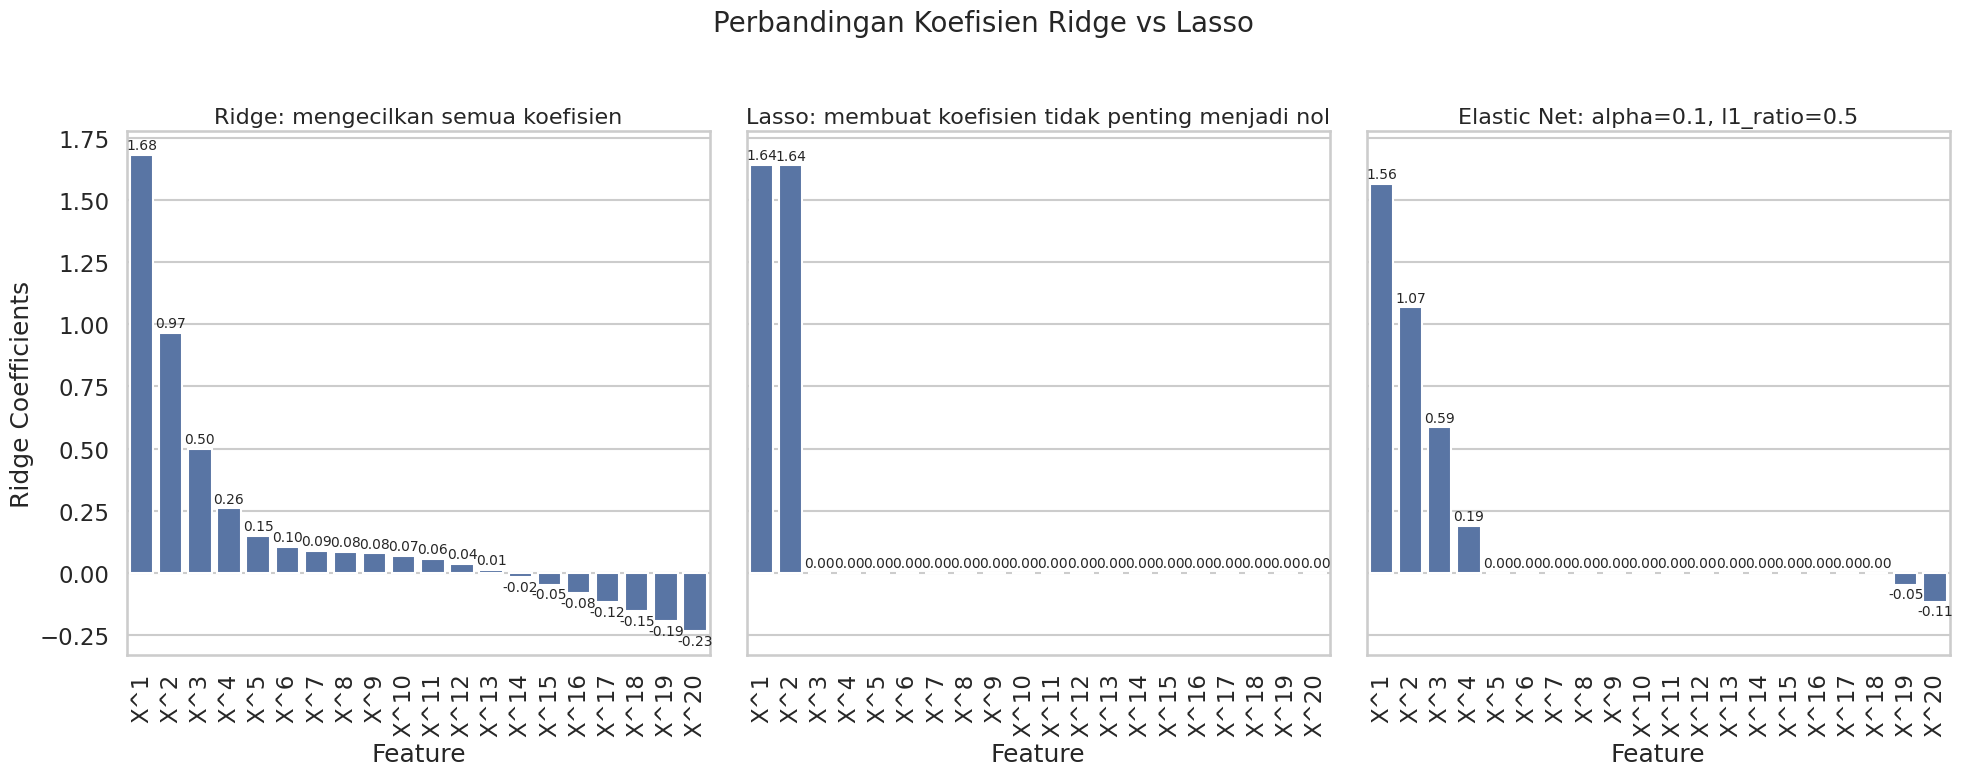

In [21]:
from sklearn.linear_model import Ridge, Lasso

# latih ulang Ridge dan Lasso untuk perbandingan
ridge_model = Ridge(alpha=1.0).fit(X_poly_scaled, Y)
lasso_model = Lasso(alpha=0.1).fit(X_poly_scaled, Y)

ridge_coeffs = ridge_model.coef_
lasso_coeffs = lasso_model.coef_

# mambuat dataframe untuk plotting
coeffs_df = pd.DataFrame({
    'Feature': [f"X^{i+1}" for i in range(X_poly_scaled.shape[1])],
    'Ridge Coefficients': ridge_coeffs,
    'Lasso Coefficients': lasso_coeffs,
    'ElasticNet': elastic_net_coeffs
})

fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle("Perbandingan Koefisien Ridge vs Lasso", fontsize=20)

# plot ridge coefficients
barax = sns.barplot(ax=axes[0], x='Feature', y='Ridge Coefficients', data=coeffs_df)
for container in barax.containers:
    barax.bar_label(container, fontsize=10, fmt="%.2f", label_type='edge', padding=2)
axes[0].set_title("Ridge: mengecilkan semua koefisien", fontsize=16)
axes[0].tick_params(axis='x', rotation=90)

# plot lasso coefficients
barax = sns.barplot(ax=axes[1], x='Feature', y='Lasso Coefficients', data=coeffs_df)
for container in barax.containers:
    barax.bar_label(container, fontsize=10, fmt="%.2f", label_type='edge', padding=2)
axes[1].set_title("Lasso: membuat koefisien tidak penting menjadi nol", fontsize=16)
axes[1].tick_params(axis='x', rotation=90)

# plot elastic net
barax = sns.barplot(ax=axes[2], x='Feature', y='ElasticNet', data=coeffs_df)
for container in barax.containers:
    barax.bar_label(container, fontsize=10, fmt="%.2f", label_type='edge', padding=2)
axes[2].set_title("Elastic Net: alpha=0.1, l1_ratio=0.5", fontsize=16)
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Analisis:**

Perhatikan bagaimana hasil Elastic Net adalah **campuran** dari Ridge dan Lasso. Seperti Lasso, ia berhasil membuat banyak koefisien menjadi nol (melakukan seleksi fitur). Namun, untuk koefisien yang tidak nol, besarnya cenderung lebih mirip dengan hasil dari Ridge.


---
### 6. Aturan Praktis: Kapan Menggunakan Elastic Net?

1.  **Sebagai Default yang Lebih Baik:** Banyak praktisi lebih memilih Elastic Net daripada Lasso sebagai titik awal. Lasso bisa berperilaku tidak menentu jika ada banyak fitur yang saling berkorelasi tinggi (multikolinearitas). Elastic Net cenderung lebih stabil dalam situasi seperti itu.

2.  **Saat Anda Tidak Yakin:** Jika Anda tidak memiliki hipotesis yang kuat apakah sebagian besar fitur penting (kasus Ridge) atau hanya sebagian kecil yang penting (kasus Lasso), Elastic Net adalah pilihan yang aman. Anda bisa melakukan *hyperparameter tuning* pada `l1_ratio` untuk menemukan campuran terbaik.

3.  **Saat Fitur Berkorelasi Tinggi:** Jika dataset Anda memiliki grup fitur yang saling berkorelasi kuat, Lasso cenderung akan memilih salah satu fitur dari grup tersebut secara acak dan mengabaikan sisanya. Elastic Net, karena komponen Ridge-nya, cenderung akan mempertahankan semua fitur dalam grup tersebut bersama-sama.

**Kapan tidak menggunakannya?** Jika Anda **pasti** ingin model yang sangat *sparse* (sedikit fitur) untuk kemudahan interpretasi, Lasso murni mungkin merupakan pilihan yang lebih langsung.


### Kesimpulan

* **Elastic Net** adalah teknik regularisasi fleksibel yang menggabungkan penalti L1 (Lasso) dan L2 (Ridge).
* Ia dikendalikan oleh dua hyperparameter: `alpha` (kekuatan regularisasi) dan `l1_ratio` (rasio campuran).
* Ini seringkali menjadi pilihan yang lebih disukai daripada Lasso karena lebih stabil dan memberikan yang terbaik dari kedua dunia: seleksi fitur dan penanganan multikolinearitas.

Dengan ini, Anda telah melengkapi pemahaman Anda tentang teknik-teknik regularisasi utama untuk model linear!
